In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
from collections import Counter
import itertools
from matplotlib import pyplot as plt

semeval_restaurants_train_path = '../semeval16_restaurants_train.xml'

xml_data = open(semeval_restaurants_train_path, 'r').read()  # Read file
root = ET.XML(xml_data)  # Parse XML

plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
class Review:
  def __init__(self, sentences):
    self.sentences = sentences

In [3]:
class Sentence:
  def __init__(self, text, opinions):
    self.text = text
    self.opinions = opinions

In [4]:
class Opinion:
  def __init__(self, target, category, polarity, start, end):
    self.target = target
    self.category = category
    self.polarity = polarity
    self.start = start
    self.end = end

In [5]:
reviews = []

In [6]:
for _, review in enumerate(root):
  current_sentences = []

  for _, sentences in enumerate(review):
    for _, sentence in enumerate(sentences):
      opinions = []
      text = ""

      for _, sentence_children in enumerate(sentence):
        if sentence_children.tag == 'Opinions':
          for _, opinion in enumerate(sentence_children):
            op = Opinion(
                target = opinion.attrib["target"] if "target" in opinion.attrib else "",
                category = opinion.attrib["category"] if "category" in opinion.attrib else "",
                polarity = opinion.attrib["polarity"] if "polarity" in opinion.attrib else "",
                start = opinion.attrib["from"] if "from" in opinion.attrib else "",
                end = opinion.attrib["to"] if "to" in opinion.attrib else ""
            )
            opinions.append(op)
        if sentence_children.tag == 'text':
          text = ""

      sen = Sentence(text, opinions)
      current_sentences.append(sen)
        
  newReview = Review(current_sentences)
  reviews.append(newReview)

In [7]:
print(len(reviews))

350


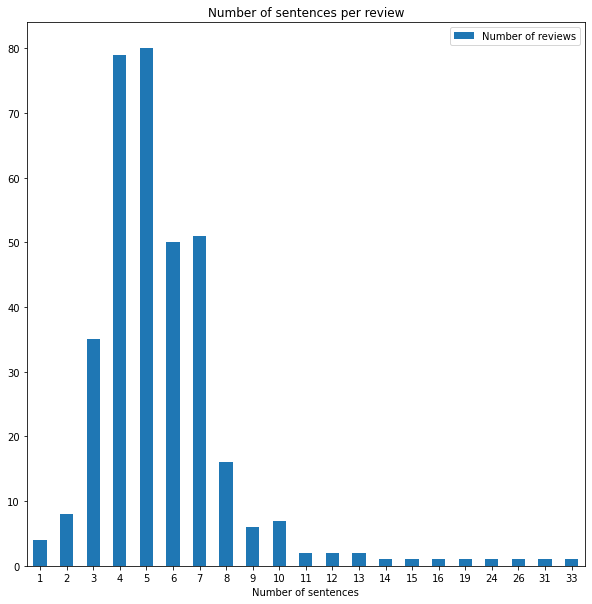

In [8]:
number_of_sentences_per_review = sorted(dict(Counter(list(map(lambda review: len(review.sentences), reviews)))).items())

df_no_sen_per_rev = pd.DataFrame(number_of_sentences_per_review, columns =['Number of sentences', 'Number of reviews'])
df_no_sen_per_rev.plot.bar(x='Number of sentences', y='Number of reviews', rot=0)
plt.title('Number of sentences per review')
plt.savefig('nosentsperrev.png', bbox_inches='tight')

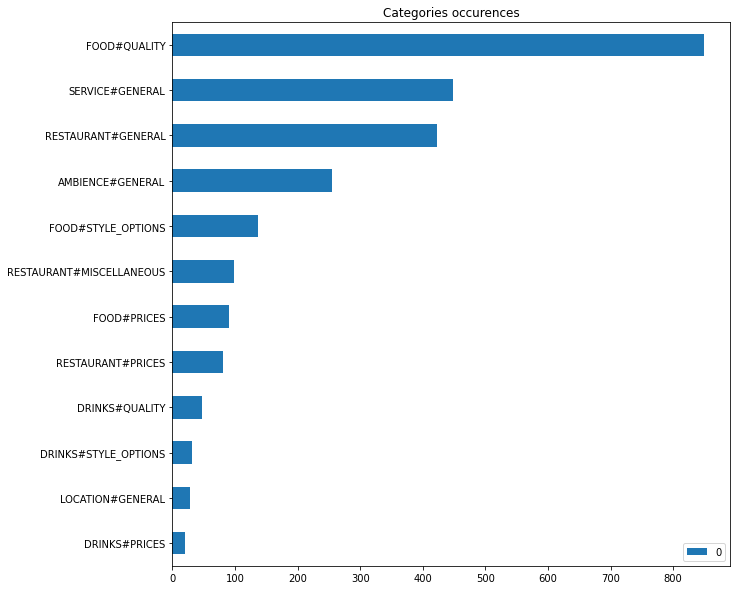

In [9]:
all_sentences = [review.sentences for review in reviews]
all_sentences = list(itertools.chain(*all_sentences))

all_opinions = [sentence.opinions for sentence in all_sentences]
all_opinions = list(itertools.chain(*all_opinions))

all_categories = dict(Counter([opinion.category for opinion in all_opinions]))
df_categories_occurences = pd.DataFrame.from_dict(all_categories, orient='index')
df_categories_occurences.sort_values(0).plot.barh(rot=0)
plt.title('Categories occurences')
plt.savefig('categoriesoccurences.png', bbox_inches='tight')

In [10]:
all_sentences = [review.sentences for review in reviews]
all_sentences = list(itertools.chain(*all_sentences))

all_opinions = [sentence.opinions for sentence in all_sentences]
all_opinions = list(itertools.chain(*all_opinions))

all_targets = list(dict(Counter([opinion.target for opinion in all_opinions])).items())

# print(all_targets)
print(sorted(all_targets, key = lambda x: x[1], reverse=True))

print('Number of total targets: ' + str(len(all_targets)))

[('NULL', 627), ('food', 216), ('place', 124), ('service', 121), ('restaurant', 47), ('staff', 38), ('Service', 26), ('atmosphere', 26), ('pizza', 24), ('sushi', 21), ('decor', 20), ('waiter', 19), ('Food', 17), ('menu', 16), ('dishes', 15), ('waitress', 14), ('meal', 14), ('drinks', 13), ('wine list', 11), ('spot', 11), ('ambience', 11), ('rolls', 11), ('dessert', 10), ('fish', 10), ('portions', 9), ('bagels', 9), ('manager', 9), ('wine', 8), ('Pizza', 7), ('ingredients', 6), ('waiters', 6), ('location', 6), ('Indian food', 6), ('view', 5), ('crust', 5), ('hostess', 5), ('wait', 5), ('people', 5), ('toppings', 5), ('wait staff', 5), ('rice', 5), ('dinner', 5), ('lobster sandwich', 5), ('Sushi', 5), ('Casa La Femme', 5), ('meals', 4), ('seafood', 4), ('vibe', 4), ('setting', 4), ('wines', 4), ('server', 4), ('salad', 4), ('chef', 4), ('ambiance', 4), ('servers', 4), ('sandwiches', 4), ('PLACE', 4), ('customer service', 4), ('music', 4), ('salmon', 4), ('Suan', 4), ('chicken', 4), ('dis

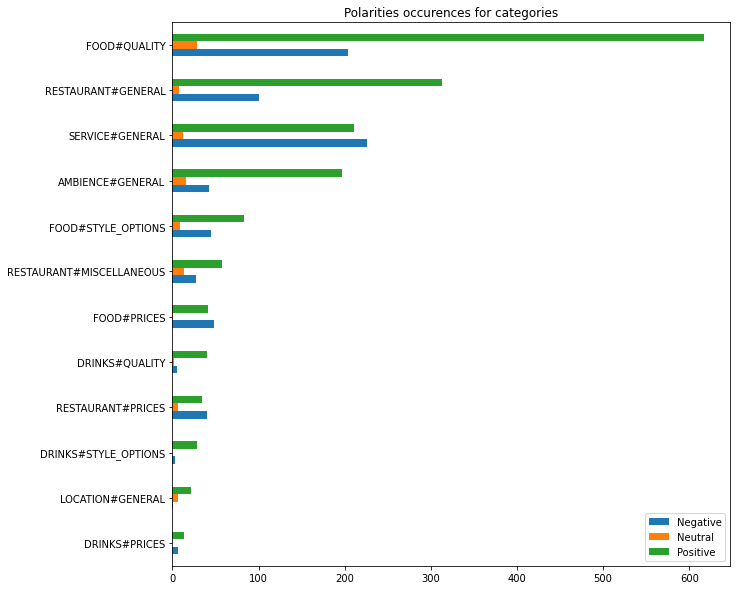

In [11]:
all_categories_with_polarity_list = dict(Counter([(opinion.category, opinion.polarity) for opinion in all_opinions]))

all_categories_with_polarity = []
data_cat_pol = {}

for k in all_categories_with_polarity_list:
  all_categories_with_polarity.append((k[0], k[1], all_categories_with_polarity_list[k]))

for cat_pol in all_categories_with_polarity:
  if cat_pol[0] not in data_cat_pol:
    data_cat_pol[cat_pol[0]] = [0, 0, 0]
  if cat_pol[1] == 'neutral':
    data_cat_pol[cat_pol[0]][1] += cat_pol[2]
  elif cat_pol[1] == 'negative':
    data_cat_pol[cat_pol[0]][0] += cat_pol[2]
  elif cat_pol[1] == 'positive':
    data_cat_pol[cat_pol[0]][2] += cat_pol[2]
    
df_categories_polarities = pd.DataFrame.from_dict(data_cat_pol, orient='index')
df_categories_polarities.sort_values([2, 0, 1]).plot.barh(rot=0) 
plt.legend(["Negative", "Neutral", "Positive"]);
plt.title('Polarities occurences for categories')
plt.savefig('poloccforcategories.png', bbox_inches='tight')

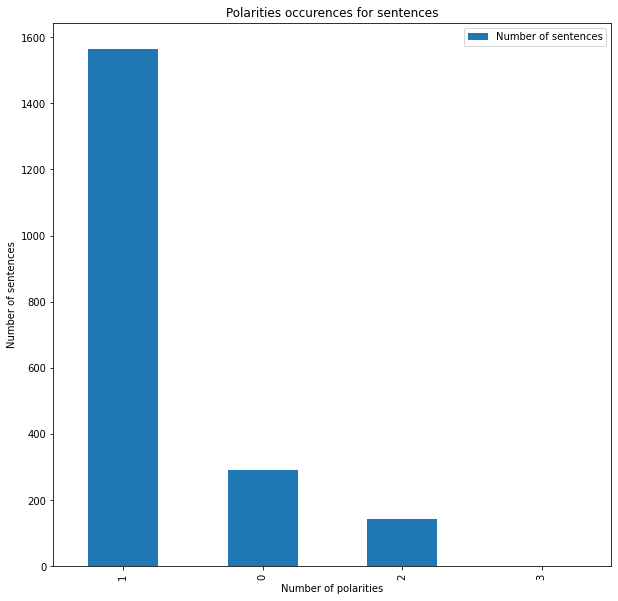

In [12]:
# for sentence in all_sentences:
#   print(len(dict(Counter([opinion.polarity for opinion in sentence.opinions]))))

no_opinions_per_sentence = [len(dict(Counter([opinion.polarity for opinion in sentence.opinions]))) for sentence in all_sentences]

df_no_opinions_per_sentence = pd.DataFrame.from_dict(dict(Counter(no_opinions_per_sentence)), orient='index')
df_no_opinions_per_sentence.plot.bar()

plt.legend(["Number of sentences"]);
plt.title('Polarities occurences for sentences')
plt.xlabel('Number of polarities')
plt.ylabel('Number of sentences')
plt.savefig('poloccforsentences.png', bbox_inches='tight')